# Stability Analysis for Pahoehoe to a'a project

### When coupled with utils.py, this notebook graphs the stability results of the Linear Stability Analysis first introduced in Yih 1967 https://doi.org/10.1017/jfm.2017.418. 

#### For verification purposes, copy and paste the following into the notebook cell below:
```
from utils import *
N_POINTS = 2500
params = {"g" : 1, "d1" : 1, "d2" : 2, "d2s" : [1.25, 2.5, 5, 10], "mu1" : 1, "mu2" : .8, "mu2s" : np.linspace(1.001, 100, N_POINTS), "rho1" : 1, "rho2" : 1, "U0" : 1, "dP" : 0, "verbose" : False, "colors_red" : [ "#fdecdd", "#fdbe85", "#fd8d3c", "#d94701"], "colors_blue":  ["#eef0fe", "#bdd7e7", "#6baed6", "#2171b5"],
}
plot_stability_graph(**params)

```
#### The graph generated should match that of Figure 2(b) in https://doi.org/10.1017/jfm.2017.418. 

# Notebook Use: 
#### Full instructions can be found in the readme. The graphing functions ```plot_stability_graph()``` and ```plot_vel_profile()``` rely on the construction of the ```params``` dictionary with specially named variables. The presence of ranged values for mu2, rho2, and dP within ```params``` results in the graphing of the stability over that variable, using the other parameters declared. 

#### ```params``` can validly contain both ```"mu2"``` and ```"mu2s"``` at the same time. When graphing stability over velocity difference, values from  ```"mu2s"``` will be used. However, if stability is graphed over density or pressure differences, the value ```"mu2"``` and ```"mu1"``` will be used to calculate a single ```"m"``` used for all points of the graph. 

## Realistic ranges of parameters

### Density: Top layer 0-10% less dense (likely an overestimate, closer to 3%), informed by Aubele 1988

### Viscosity: Could be up to 5 orders of magnitude difference between upper layer and lower layer

### Height: test very thin bottom, very thin top, equal sizes

### A1: not a good sense of what this could be 

In [1]:
from utils import *
N_POINTS = 5000

def params_dict():
        return {
        "g" : 1,

        "d1" : 1,
        "d2" : 2,
        "d2s" : [.5, .75,1.25, 2],

        "mu1" : 1,
        "mu2" : .8,
        "mu2s" : np.linspace(0.00001, .999, N_POINTS),

        "rho1" : 1,
        "rho2" : 1,
        "rho2s" : np.linspace(1, 100, N_POINTS),

        "U0" : 1,
        "dP" : 0, # K value
        "dPs" : np.linspace(0, 1000, N_POINTS),
        "verbose" : False,

        "colors_red" : ["#f4a582", "#ca0020"],
        "colors_blue":  ["#92c5de", "#0571b0"],
        "color_one" : "#dfdfaf",

        "N_POINTS" : N_POINTS,

        "legends" : (1, 1, 1),

        "viscosity_lim" : None,
        "density_lim" : None,
        "pressure_lim" : None,

        "title_size" : 12,
        "label_size" : 12, 

        "stability_figsize" : (8,4),
        "velocity_figsize" : (8,4)
    }

def plot_both(params):
    plot_stability_graph(**params)
    plot_vel_profile(**params)
    

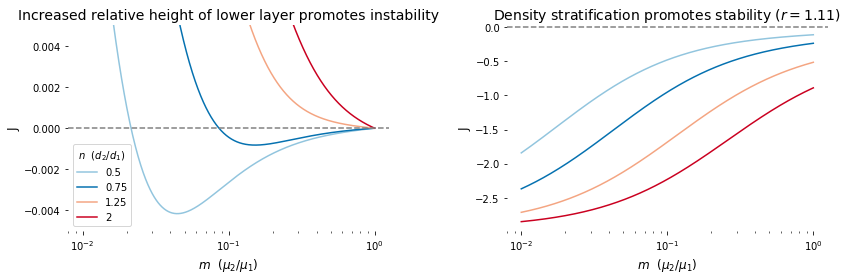

In [2]:
# panel for generating the first figure 

params = params_dict()

params["dP"] = 0
params["dPs"] = None
params["rho2s"] = None

params["mu2s"] = np.linspace(.01, .999, N_POINTS)
params["viscosity_lim"] = (-.005, .005)

params["visc_title"] = "Increased relative height of lower layer promotes instability"
params["title_size"] = 14

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot_stability_graph(ax1, **params)

params["viscosity_lim"] = None
params["rho1"] = .9
r = round(params["rho2"] / params["rho1"], 2)
params["visc_title"] = f"Density stratification promotes stability ($r = {r}$)"
params["legends"] = (0,0,0)
plot_stability_graph(ax2, **params)

filename = "images/paper_combo_basic_dens"
plt.tight_layout()
#fig.savefig(filename)

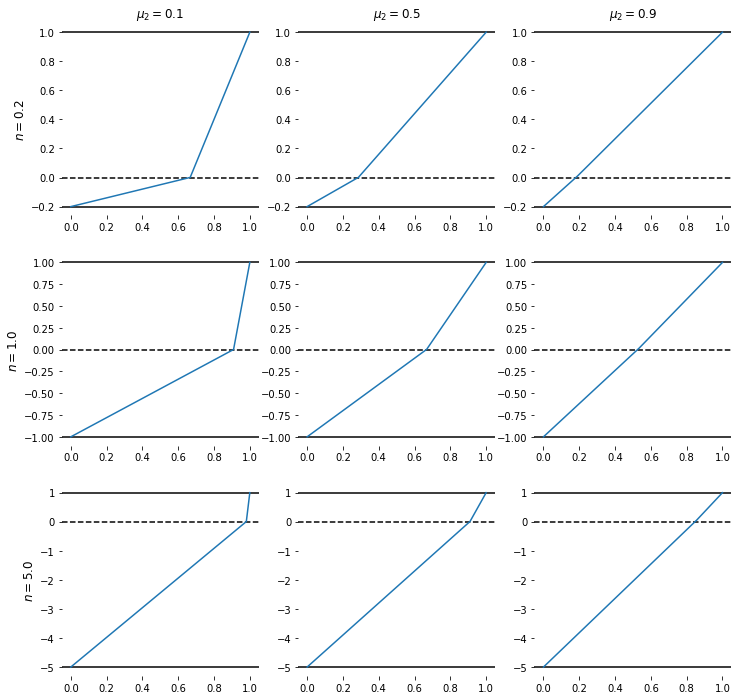

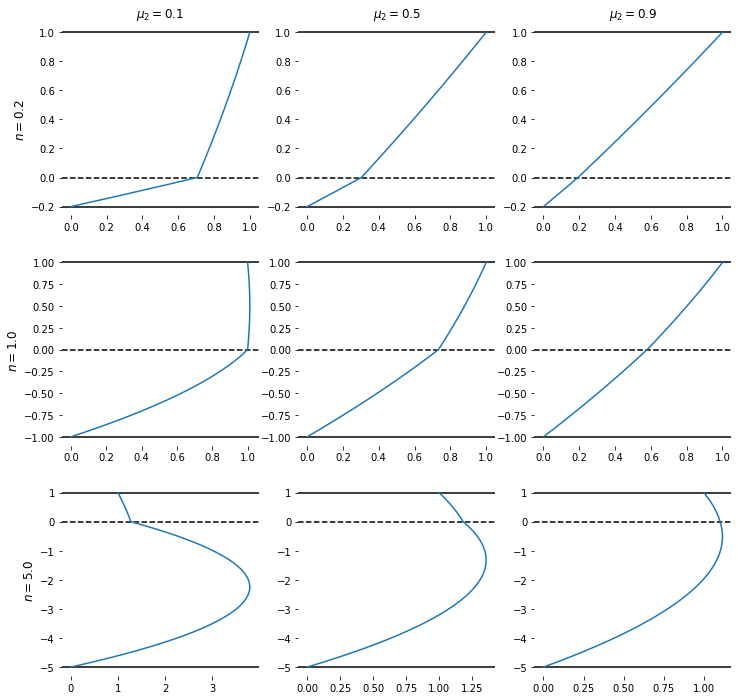

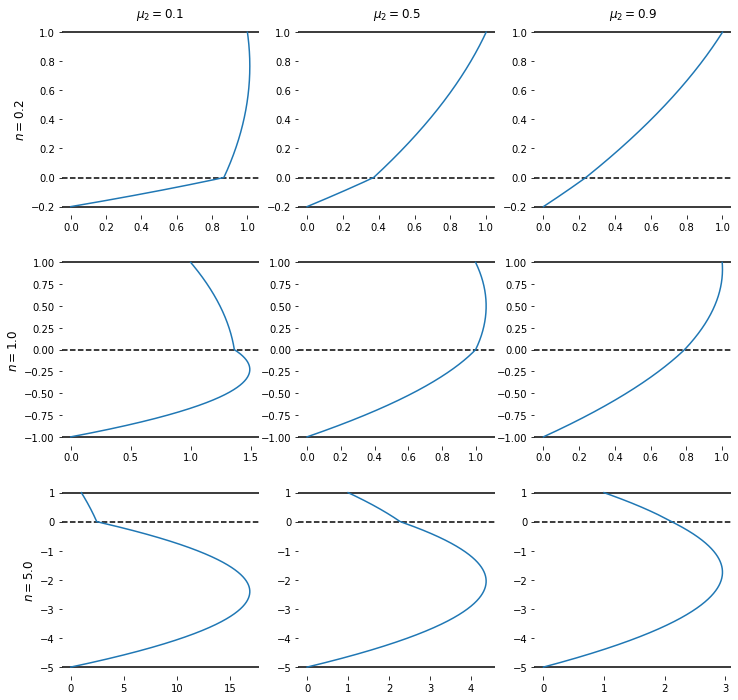

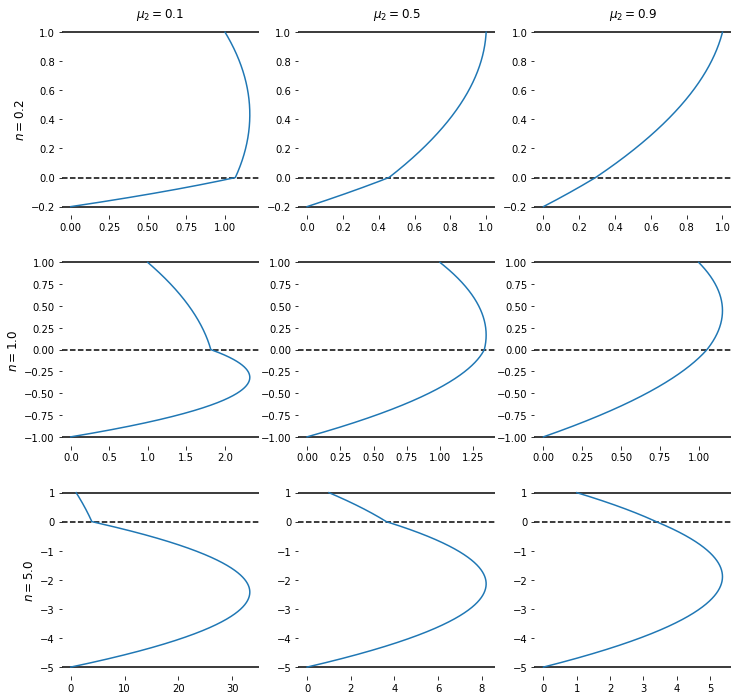

In [17]:
params = params_dict()

dPs = [0, .1, .5, 1]

for dP in dPs:
    params["dP"] = dP
    fig, axes = plt.subplots(3, 3, figsize=(12,12))
    d2s = [.2, 1, 5]
    mu2s = [.1, .5, .9]
    count = 0
    for d2 in d2s:
        for mu2 in mu2s:
            params["d2"] = d2
            params["mu2"] = mu2
            params["vel_title"] = None
            params["y_label"] = None
            if count < 3:
                params["vel_title"] = "$\mu_2 = $" + str(mu2 / params["mu1"])
            else:
                params["vel_title"] = ""
            if count % 3 == 0:
                params["y_label"] = "$n = $" + str(d2 / params["d1"])

            plot_vel_profile(axes[count // 3][count % 3], **params)
            count += 1

In [4]:
# # First figure, show that increased height of lower flow promotes instability
# def gen_params_for_surfacedriven_noK(save=False):
#     params = params_dict()
    
#     params["dP"] = 0
#     params["dPs"] = None
#     params["rho2s"] = None
    
#     params["mu2s"] = np.linspace(.01, .999, N_POINTS)
#     params["viscosity_lim"] = (-.005, .005)
    
#     params["visc_title"] = "Increased relative height of lower layer promotes instability"
#     params["title_size"] = 14
#     params["stability_figsize"] = (7, 4)
    
#     if save:
#         params["save"] = "paper_noK_height1"
    
#     return params
    
# params = gen_params_for_surfacedriven_noK()
# plot_both(params)


# #Second figure, show that introduction of density difference reduces instability
# def gen_params_surface_driven_w_density(save=False):
#     params = gen_params_for_surfacedriven_noK()
    
#     params["rho1"] = .95
#     r = round(params["rho2"] / params["rho1"], 2)
#     params["visc_title"] = f"Density stratification promotes stability ($r = {r}$)"
#     params["viscosity_lim"] = None
    
#     params["legends"] = (0,0,0)
#     params["mu2s"] = np.linspace(.00001, .999, N_POINTS)
    
#     if save:
#         params["save"] = "paper_surface_introduce_dens"
    
#     return params

# params = gen_params_surface_driven_w_density()
# plot_stability_graph(**params)

# # Third figure, introduction of dp/dx promotes instability

# # to continue here we need a better notion of what the dp dx looks like at each height
# def gen_params_dp(save=False):
#     params = gen_params_for_surfacedriven_noK()
#     params["visc_title"] = None
#     params["viscosity_lim"] = (-.1, .1)
#     params["dP"] = 1
    
#     if save:
#         params["save"] = "dp placeholder"
#     return params

# p1 = gen_params_for_surfacedriven_noK()
# p2 = gen_params_dp()
# plot_both(p1)
# plot_both(p2)

# p2["d2"] = 0.5
# p2["mu2"] = .07
# plot_vel_profile(**p2)
# p2["d2"] = 0.75
# plot_vel_profile(**p2)
# p2["d2"] = 1.25
# plot_vel_profile(**p2)